In [2]:
import pandas as pd 
import networkx as nx
import itertools
from matplotlib.patches import Polygon
import operator
from matplotlib.collections import PatchCollection
import decimal
import pickle as pkl
import plotly.graph_objects as go
import os
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText


new_path=os.getcwd()
new_path =new_path[:-13]
if new_path not in sys.path:
    sys.path.append(new_path)
#----
import continuous2graph
import pre_extraction
import quality_measure
import terminal_computation 
import filtering
import utils
#----

# PlotlyVisualizationModule 14: *Straight line*.

### Defining a straight-line image

In [7]:
N=10
colors = utils.horizontal_line(N)
partition_dict, dict_seq, node2box_index = quality_measure.partition_set(N)

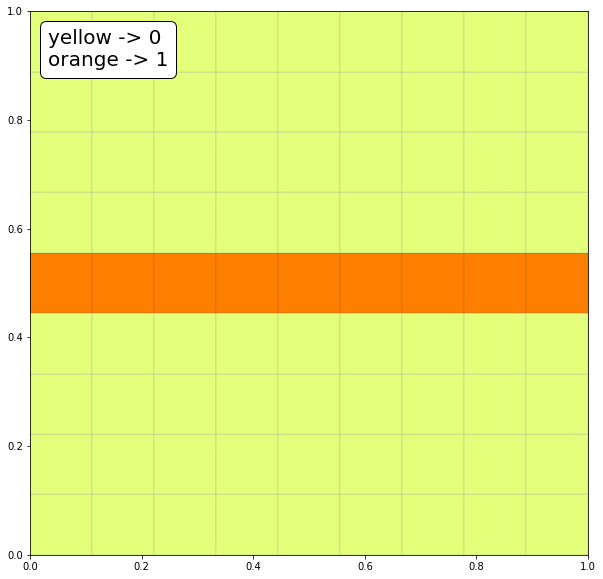

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
patches = []

for key in partition_dict:
    square_edges=np.asarray([partition_dict[key][0]]+[partition_dict[key][2]]+[partition_dict[key][3]]+[partition_dict[key][1]]+[partition_dict[key][0]])
    #print(square_edges)
    #print(len(square_edges))
    s1 = Polygon(square_edges)
    patches.append(s1)
p = PatchCollection(patches, alpha=1,cmap='Wistia',linewidth=.1,edgecolor='b')


#colors = np.array(range(M))
p.set_array(colors)
ax.add_collection(p)

#print(len(colors))
tdens_dict = {}
for key in partition_dict.keys():
    #print(key)
    tdens_dict[key]=colors[key-1]
    
at = AnchoredText("yellow -> 0 \norange -> 1",
                  prop=dict(size=20), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.3")
ax.add_artist(at)

### Extracting the graph

In [13]:
G_bar = pre_extraction.weighted_partition2bar_graph(partition_dict, colors)

G_pre_extracted = G_bar.copy()
#print(G_bar.nodes(data=True))
# filtering
edges_ = list(G_pre_extracted.edges())
G_pre_extracted.remove_edges_from(edges_)
# print('getting graph')


graph_type = "1"


G_pre_extracted = pre_extraction.node_edge_filter(G_pre_extracted, 
                                                  .5,
                                                  graph_type, 
                                                  dict_seq, 
                                                  'ER',
                                                  'image',
                                                  node2box_index)  # 12

### Showing the weights of the edges in the graph

In [21]:
for edge in G_pre_extracted.edges():
    print(edge,'weight=',G_pre_extracted.edges[edge]['weight'])

(4, 13) weight= 1.5
(13, 22) weight= 1.0
(22, 31) weight= 1.0
(31, 40) weight= 1.0
(40, 49) weight= 1.0
(49, 58) weight= 1.0
(58, 67) weight= 1.0
(67, 76) weight= 1.5


/home/dtheuerkauf/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



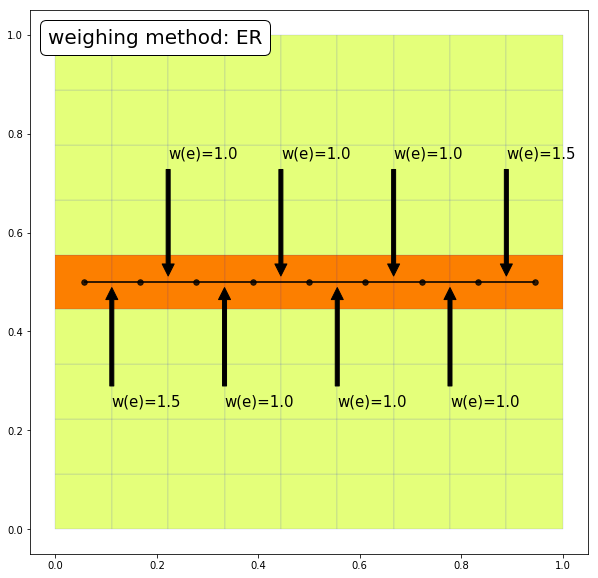

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
patches = []
for key in partition_dict:
    square_edges=np.asarray([partition_dict[key][0]]+[partition_dict[key][2]]+[partition_dict[key][3]]+[partition_dict[key][1]]+[partition_dict[key][0]])
    #print(square_edges)
    #print(len(square_edges))
    s1 = Polygon(square_edges)
    patches.append(s1)
p = PatchCollection(patches, alpha=1,cmap='Wistia',linewidth=.1,edgecolor='b')

#colors = np.array(range(M))
p.set_array(colors)
ax.add_collection(p)
    
small_G_pre_extracted=G_pre_extracted.copy()
small_G_pre_extracted.remove_nodes_from(list(nx.isolates(G_pre_extracted)))

pos=nx.get_node_attributes(small_G_pre_extracted,'pos')
nx.draw_networkx(small_G_pre_extracted, pos, node_size=30,width=2,with_labels=False,edge_color='black',alpha=0.8,node_color='black',ax=ax)

sign = 1

for edge in small_G_pre_extracted.edges():
    
    x_arrow = .5*small_G_pre_extracted.nodes[edge[0]]['pos'][0] + .5*small_G_pre_extracted.nodes[edge[1]]['pos'][0]
    y_arrow = .5*small_G_pre_extracted.nodes[edge[0]]['pos'][1] + .5*small_G_pre_extracted.nodes[edge[1]]['pos'][1]
    
    sign = sign*(-1)
    
    x_text = x_arrow - .00000001
    y_text = y_arrow +sign*.25
    
    text = str(small_G_pre_extracted.edges[edge]['weight'])
    ax.annotate('w(e)='+text, xy=(x_arrow,y_arrow), xytext=(x_text , y_text),size=15,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
at = AnchoredText("weighing method: ER",
                  prop=dict(size=20), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.3")
ax.add_artist(at)

### Computing the quality measure of the graph

In [25]:
qm={}
qm[N]={}

print('\n      N    | Pre-extracted Graph    |')
print('           |       qw   |  L        |')

q_measure, q_weight, L, triang_weight_vector, weight_difference_vector = quality_measure.q_measure(G_pre_extracted,
                                                           G_bar, 
                                                           partition_dict, 
                                                           'l1', min_=.5)
qm[N]['qw'] = q_weight
qm[N]['L'] = L
    
print("%10.2e"%N,'|',"%f"% qm[N]['qw'],'  |',
          "%f "% qm[N]['L'],'|')


      N    | Pre-extracted Graph    |
           |       qw   |  L        |
  1.00e+01 | 0.012346   | 0.888889  |


# PlotlyVisualizationModule 15: *Quality measure on straight-line graphs*.

The length converges to 1 and the weighted part to 0.

In [28]:
qm={}
print('\n      N    | Pre-extracted Graph    |')
print('           |       qw   |  L        |')
for N in range(3,30):
    
    qm[N]={}

    
    partition_dict, dict_seq, node2box_index = quality_measure.partition_set(N)
    _, G_triang = quality_measure.partition(N)
    
    colors = utils.horizontal_line(N)
    
    G_bar = pre_extraction.weighted_partition2bar_graph(partition_dict, colors)
    
    G_pre_extracted = G_bar.copy()
    #print(G_bar.nodes(data=True))
    # filtering
    edges_ = list(G_pre_extracted.edges())
    G_pre_extracted.remove_edges_from(edges_)
    # print('getting graph')


    graph_type = "1"


    G_pre_extracted = pre_extraction.node_edge_filter(G_pre_extracted, 
                                                      .5,
                                                      graph_type, 
                                                      dict_seq, 
                                                      'ER',
                                                      'image',
                                                      node2box_index)  # 12
    
    
    q_measure, q_weight, L, triang_weight_vector, weight_difference_vector = quality_measure.q_measure(G_pre_extracted,
                                                           G_bar, 
                                                           partition_dict, 
                                                           'l1', min_=.5)
    qm[N]['qw'] = q_weight
    qm[N]['L'] = L

    print("%10.3e"%N,'|',"%f"% qm[N]['qw'],'  |',
              "%f "% qm[N]['L'],'|')




      N    | Pre-extracted Graph    |
           |       qw   |  L        |
 3.000e+00 | 0.000000   | 0.500000  |
 4.000e+00 | 0.111111   | 0.666667  |
 5.000e+00 | 0.062500   | 0.750000  |
 6.000e+00 | 0.040000   | 0.800000  |
 7.000e+00 | 0.027778   | 0.833333  |
 8.000e+00 | 0.020408   | 0.857143  |
 9.000e+00 | 0.015625   | 0.875000  |
 1.000e+01 | 0.012346   | 0.888889  |
 1.100e+01 | 0.010000   | 0.900000  |
 1.200e+01 | 0.008264   | 0.909091  |
 1.300e+01 | 0.006944   | 0.916667  |
 1.400e+01 | 0.005917   | 0.923077  |
 1.500e+01 | 0.005102   | 0.928571  |
 1.600e+01 | 0.004444   | 0.933333  |
 1.700e+01 | 0.003906   | 0.937500  |
 1.800e+01 | 0.003460   | 0.941176  |
 1.900e+01 | 0.003086   | 0.944444  |
 2.000e+01 | 0.002770   | 0.947368  |
 2.100e+01 | 0.002500   | 0.950000  |
 2.200e+01 | 0.002268   | 0.952381  |
 2.300e+01 | 0.002066   | 0.954545  |
 2.400e+01 | 0.001890   | 0.956522  |
 2.500e+01 | 0.001736   | 0.958333  |
 2.600e+01 | 0.001600   | 0.960000  |
 2.700e+01 

In [29]:
qm

{3: {'qw': 0.0, 'L': 0.5},
 4: {'qw': 0.1111111111111111, 'L': 0.6666666666666666},
 5: {'qw': 0.0625, 'L': 0.75},
 6: {'qw': 0.04, 'L': 0.8},
 7: {'qw': 0.027777777777777776, 'L': 0.8333333333333334},
 8: {'qw': 0.02040816326530612, 'L': 0.8571428571428572},
 9: {'qw': 0.015625, 'L': 0.875},
 10: {'qw': 0.012345679012345678, 'L': 0.8888888888888888},
 11: {'qw': 0.01, 'L': 0.8999999999999999},
 12: {'qw': 0.008264462809917356, 'L': 0.9090909090909092},
 13: {'qw': 0.006944444444444444, 'L': 0.9166666666666666},
 14: {'qw': 0.005917159763313609, 'L': 0.9230769230769231},
 15: {'qw': 0.00510204081632653, 'L': 0.9285714285714285},
 16: {'qw': 0.0044444444444444444, 'L': 0.9333333333333333},
 17: {'qw': 0.00390625, 'L': 0.9375},
 18: {'qw': 0.0034602076124567475, 'L': 0.9411764705882353},
 19: {'qw': 0.0030864197530864196, 'L': 0.9444444444444444},
 20: {'qw': 0.002770083102493075, 'L': 0.9473684210526315},
 21: {'qw': 0.0025, 'L': 0.9500000000000001},
 22: {'qw': 0.0022675736961451248, '

#### Saving the results

In [33]:
qm_weights = np.array([qm[N]['qw'] for N in qm.keys()])
qm_L = np.array([qm[N]['L'] for N in qm.keys()])

with open('./qw_3-29.pkl', 'wb') as file:
    pkl.dump(qm_weights,file)
with open('./L_3-29.pkl', 'wb') as file:
    pkl.dump(qm_L,file)